In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
# for Jupyter Notebook means to show plots inline instead of in a new window

In [55]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Missing Values in Titanic Dataset')

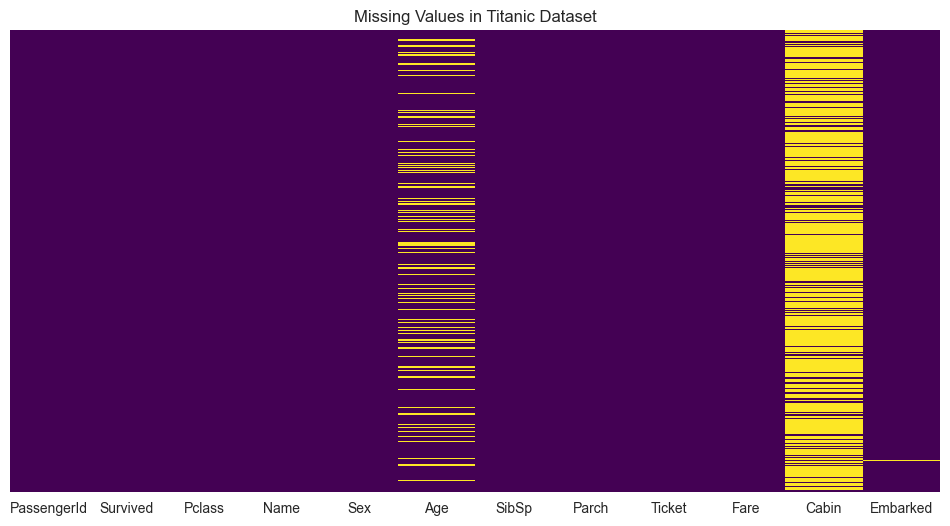

In [57]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# heatmap(data = train.isnull(), yticklabels = is the row labels, cbar = color bar, cmap = color map)
plt.title('Missing Values in Titanic Dataset')
# shows the missing values in the dataset

<Axes: xlabel='Survived', ylabel='count'>

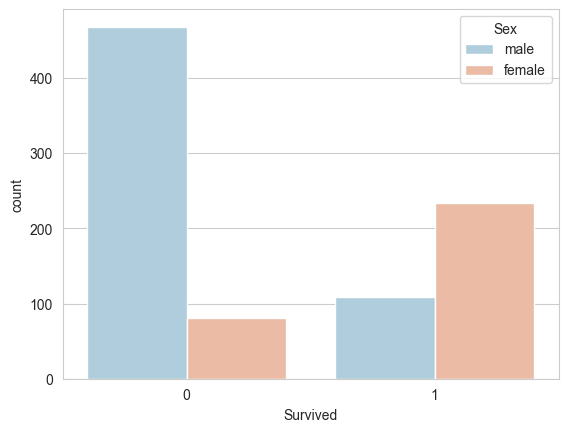

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')
# countplot(x = x-axis, data = dataset, hue = categorical variable to split the data, palette = color palette)
# shows the number of survivors and non-survivors in the dataset by sex

<Axes: xlabel='Survived', ylabel='count'>

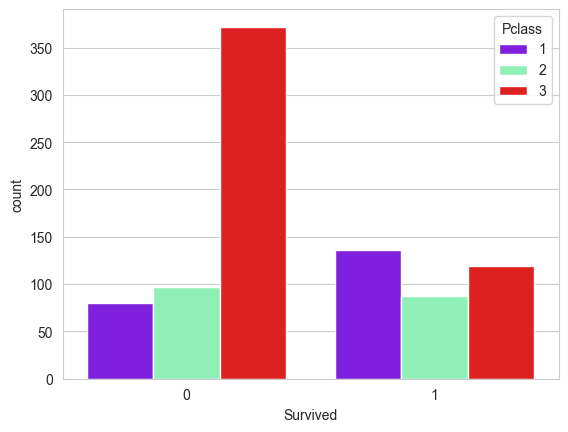

In [59]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')
# shows the number of survivors and non-survivors in the dataset by passenger class

Text(0.5, 1.0, 'Age Distribution of Passengers')

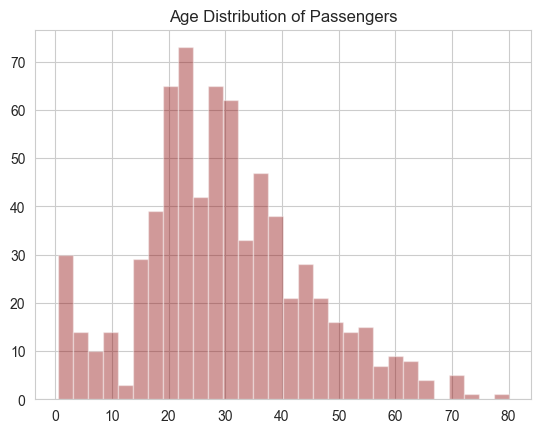

In [60]:
train['Age'].hist(bins=30, color='darkred', alpha=0.4)
# hist(x = x-axis, bins = number of bins (bars), color = color of the bars, alpha = transparency)
plt.title('Age Distribution of Passengers')
# shows the distribution of ages of passengers in the dataset

Text(0.5, 1.0, 'Number of Siblings/Spouses Aboard')

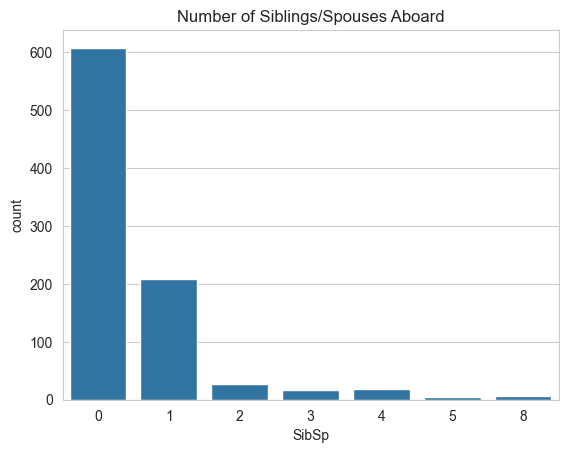

In [61]:
sns.countplot(x='SibSp', data=train)
# shows if the person came with family or not
plt.title('Number of Siblings/Spouses Aboard')

Text(0.5, 1.0, 'Age Distribution of Passengers Who Came Alone')

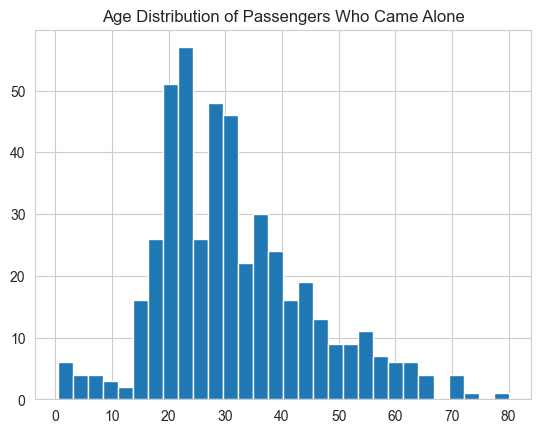

In [62]:
train[train['SibSp'] == 0]['Age'].hist(bins=30)
# shows the distribution of ages of passengers who came alone
plt.title('Age Distribution of Passengers Who Came Alone')

Text(0.5, 1.0, 'Fare Distribution of Passengers')

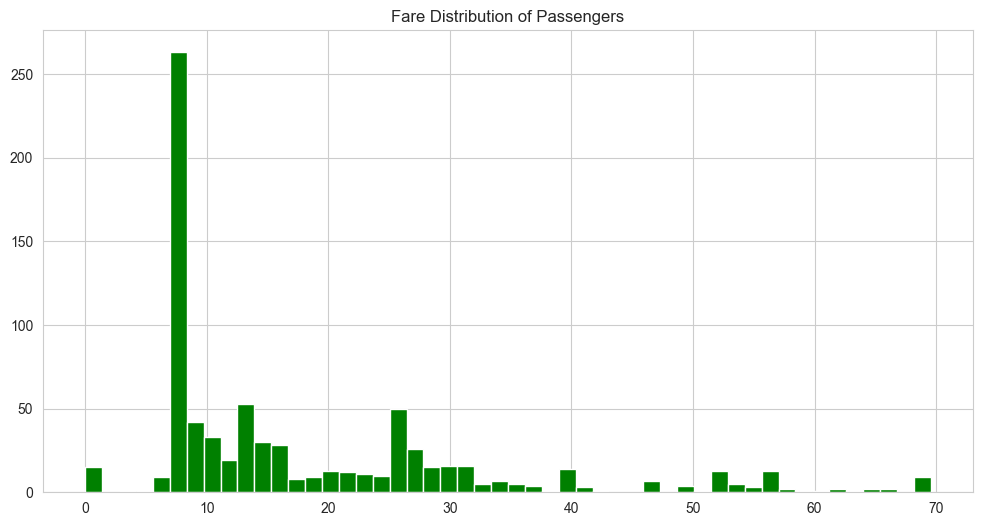

In [63]:
train[train['Fare'] < 70]['Fare'].hist(color='green', bins=50, figsize=(12, 6))
# shows the distribution of fares of passengers in the dataset
plt.title('Fare Distribution of Passengers')

- pra aplicar esses dados em um modelo de ML, é preciso limpar e tratar eles, reomvendo valores nulos por exemplo

Text(0.5, 1.0, 'Age Distribution by Passenger Class')

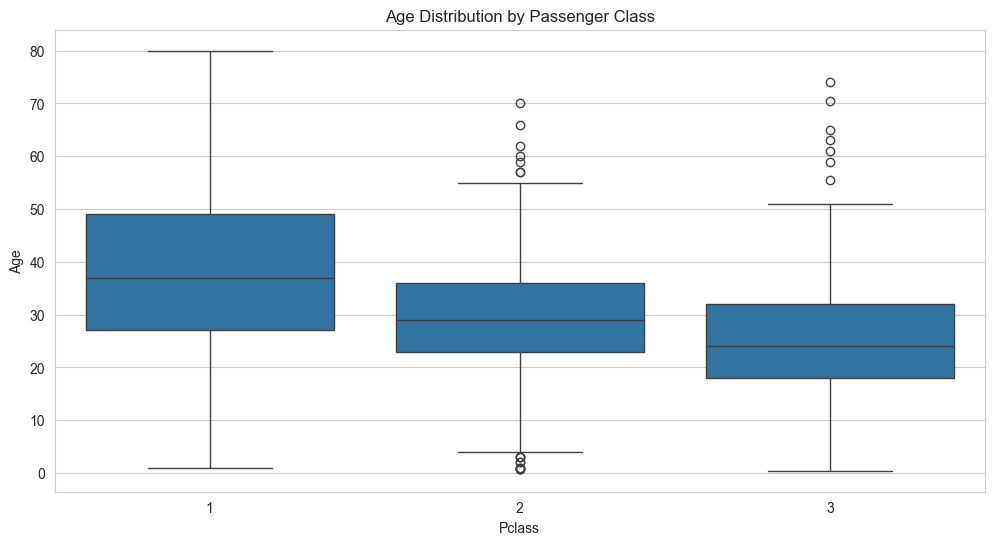

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=train)
# boxplot(x = x-axis, y = y-axis, data = dataset)
plt.title('Age Distribution by Passenger Class')
# shows the distribution of ages of passengers by passenger class

- um jeito de contornar isso é preenchendo os valores faltantes das idades com a média das idades de cada classe

In [65]:
def inputar_idade(cols):
    """
    Função para imputar a idade dos passageiros com base na classe e idade média dos passageiros da mesma classe.
    A função verifica se a idade é nula e, se for, retorna a idade média dos passageiros da mesma classe.
    """
    idade = cols[0]
    classe = cols[1]

    if pd.isnull(idade):
        if classe == 1:
            return 37
        elif classe == 2:
            return 29
        else:
            return 24
    else:
        return idade

In [66]:
train['Age'] = train[['Age', 'Pclass']].apply(inputar_idade, axis=1) # axis=1 means to apply the function to each row

In [67]:
del train['Cabin']
# train.drop('Cabin', axis=1, inplace=True)
# deletes the Cabin column from the dataset

In [68]:
train.dropna(inplace=True) # inplace=True means to modify the original dataset
# dropna() removes all rows with missing values from the dataset
# dropna(axis = remove rows '0' or columns '1', how = remove all or any missing values, inplace = modify the original dataset)

Text(0.5, 1.0, 'Missing Values in Titanic Dataset')

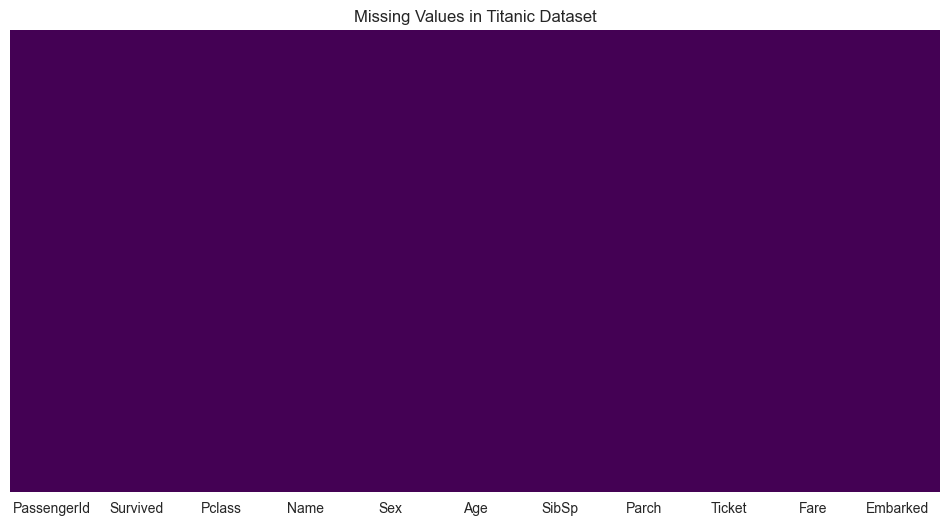

In [69]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# heatmap(data = train.isnull(), yticklabels = is the row labels, cbar = color bar, cmap = color map)
plt.title('Missing Values in Titanic Dataset')
# shows the missing values in the dataset

- o proximo passo é tratar os dados categoricos, pois o modelo trabalha com números, e não textos
- por exemplo o nome, que não influencia se morre ou não, o numero to ticket

- tratando a coluna sex

In [70]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [71]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
# get_dummies(data = dataset, drop_first = remove the first column)
# we use get_dummies to convert categorical variables into dummy/indicator variables
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


- tratando a coluna embarked

In [72]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [73]:
train['Embarked'].value_counts()
# value_counts() returns the counts of unique values in the column

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [74]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
# get the dummies for the Embarked column
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


- retirando as colunas que não vamos usar no modelo

In [75]:
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
# drop() removes the specified columns from the dataset
# axis=1 means to remove columns, axis=0 means to remove rows
train

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,24.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


- juntando as colunas que tratamos por ser texto

In [76]:
train = pd.concat([train, sex, embark], axis=1)
# concat([data1, data2], axis=1) concatenates the two datasets along the columns
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
